# OmniFold with ALEPH Open Data

### Imports

In [25]:
import os

import energyflow as ef
import energyflow.archs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot

import omnifold
import modplot
import ibu

### Plot Style

In [26]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = False

## Loading the Data

In [94]:
passes = { '':[],
          'Raw nEvent':[],
        'passesNTupleAfterCut':[],
        'passesTotalChgEnergyMin':[],
         'passesNTrkMin':[],
         'passesSTheta':[],
         'passesMissP':[],
         'passesISR':[],
         'passesWW':[],
         'passesNeuNch':[],
         'passesAll':[]
          }

In [95]:
aleph_path = '/callisto/ALEPH'

# load data, currently just get thrust values
thrust_arrs = []
thrust_arrsPreSel = []
years = ['1992', '1993', '1994', '1995']
stat = {
    '':[],
    'nEvents':[],
    'nEventsPassEventSel':[],
    'eventSelPerc':[],
    'ThrustAvgPreEventSel':[],
    'ThrustStdDevPreEventSel':[],
    'ThrustAvgPostEventSel':[],
    'ThrustStdDevPostEventSel':[]
}

for year in years:
    data_file = uproot.open(os.path.join(aleph_path, 'LEP1Data{}_recons_aftercut-MERGED.root'.format(year)))
    All = data_file['t']['passesAll'].array()
    event_mask = All
    thrust_arrsPreSel.append(data_file['t']['Thrust'].array())
    thrust_arrs.append(data_file['t']['Thrust'].array()[event_mask])
    # populate the event stats
    tPre = data_file['t']['Thrust'].array()
    tPost = data_file['t']['Thrust'].array()[event_mask]
    stat[''].append('LEP {}'.format(year))
    stat['nEvents'].append(len(tPre))
    stat['nEventsPassEventSel'].append(len(tPost))
    stat['eventSelPerc'].append(len(tPost) / len(tPre))
    stat['ThrustAvgPreEventSel'].append(np.average(tPre))
    stat['ThrustStdDevPreEventSel'].append(np.std(tPre))
    stat['ThrustAvgPostEventSel'].append(np.average(tPost))
    stat['ThrustStdDevPostEventSel'].append(np.std(tPost))
    # populate the passes dictionary [nEvent, nEvent after cut]
    passes[''].append('LEP {}'.format(year))
    passes['Raw nEvent'].append(len(tPre))
    for mask in passes.keys():
        if mask.find('passes'): continue
        eSel = data_file['t'][mask].array()
        passes[mask].append(len(tPre[eSel])/len(tPre))

# dictionary to hold observable values
nature = {'data_thrusts': np.concatenate(thrust_arrs)}
nature1992 = {'data_thrusts': thrust_arrs[0]}
nature1993 = {'data_thrusts': thrust_arrs[1]}
nature1994 = {'data_thrusts': thrust_arrs[2]}
nature1995 = {'data_thrusts': thrust_arrs[3]}
natureYears = [nature1992,nature1993,nature1994,nature1995]

# Construct data frame
# Add in stat for all years
tPre = np.concatenate(thrust_arrsPreSel)
tPost = np.concatenate(thrust_arrs)
stat[''].append('LEP All Years')
stat['nEvents'].append(len(tPre))
stat['nEventsPassEventSel'].append(len(tPost))
stat['eventSelPerc'].append(len(tPost) / len(tPre))
stat['ThrustAvgPreEventSel'].append(np.average(tPre))
stat['ThrustStdDevPreEventSel'].append(np.std(tPre))
stat['ThrustAvgPostEventSel'].append(np.average(tPost))
stat['ThrustStdDevPostEventSel'].append(np.std(tPost))
# Double check that total number of events equals sum of all of the years before and after the cuts
print(np.sum([stat['nEvents'][i] for i in range(0,len(stat['nEvents'])-1)]) == stat['nEvents'][-1])
print(np.sum([stat['nEventsPassEventSel'][i] for i in range(0,len(stat['nEventsPassEventSel'])-1)]) == stat['nEventsPassEventSel'][-1])

True
True


In [99]:
print(passes)
# construct the data frame
passes_df = pd.DataFrame.from_dict(passes)
passes_df.set_index('')

{'': ['LEP 1992', 'LEP 1993', 'LEP 1994', 'LEP 1995'], 'Raw nEvent': [14024, 538601, 1365440, 595095], 'passesNTupleAfterCut': [1.0, 1.0, 1.0, 1.0], 'passesTotalChgEnergyMin': [1.0, 0.9997939105200324, 0.999800796812749, 0.9998067535435519], 'passesNTrkMin': [0.9997147746719909, 0.9998700336612817, 0.9998505976095617, 0.9998874129340694], 'passesSTheta': [0.9766828294352539, 0.9770516579063165, 0.9768770506210452, 0.9772254850065956], 'passesMissP': [0.9715487735310896, 0.972796188644284, 0.972934731661589, 0.9730849696266982], 'passesISR': [0.98937535653166, 0.9899443187071691, 0.989827454886337, 0.9897142473050521], 'passesWW': [0.98937535653166, 0.9897753624668354, 0.9897842453714554, 0.9895310832724187], 'passesNeuNch': [0.994438106103822, 0.9946453868448072, 0.9945673189594563, 0.9945319654845025], 'passesAll': [0.9454506560182544, 0.9470015837326704, 0.9470698089992969, 0.9474016753627572]}


,Raw nEvent,passesNTupleAfterCut,passesTotalChgEnergyMin,passesNTrkMin,passesSTheta,passesMissP,passesISR,passesWW,passesNeuNch,passesAll
,,,,,,,,,,
LEP 1992,14024,1.0,1.000000,0.999715,0.976683,0.971549,0.989375,0.989375,0.994438,0.945451
LEP 1993,538601,1.0,0.999794,0.999870,0.977052,0.972796,0.989944,0.989775,0.994645,0.947002
LEP 1994,1365440,1.0,0.999801,0.999851,0.976877,0.972935,0.989827,0.989784,0.994567,0.947070
LEP 1995,595095,1.0,0.999807,0.999887,0.977225,0.973085,0.989714,0.989531,0.994532,0.947402


In [97]:
aleph_path = '/callisto/ALEPH'

# load mc, currently just get thrust values
mc_file = uproot.open(os.path.join(aleph_path, 'alephMCRecoAfterCutPaths_1994.root'))
All = mc_file['t']['passesAll'].array()
event_mask = All
synthetic = {'gen_thrusts': mc_file['tgen']['Thrust'].array()[event_mask], # removed 1 - before all three
             'genBefore_thrusts': mc_file['tgenBefore']['Thrust'].array(),
             'sim_thrusts': mc_file['t']['Thrust'].array()[event_mask]}

In [67]:
# Column names
genNames = {'t':'Reco',
            'tgen':'Gen w/Hadronic Sels.',
            'tgenBefore':'Gen w/o Hadronic Sels.'}

# Get statistics of MC
for t in ['tgen','tgenBefore','t']:
    tPre = mc_file[t]['Thrust'].array()
    try:
        tPost = mc_file[t]['Thrust'].array()[event_mask]
    except:
        tPost = mc_file[t]['Thrust'].array() # no selection for tgenBefore
    stat[''].append(genNames[t])
    stat['nEvents'].append(len(tPre))
    stat['nEventsPassEventSel'].append(len(tPost))
    stat['eventSelPerc'].append(len(tPost) / len(tPre))
    stat['ThrustAvgPreEventSel'].append(np.average(tPre))
    stat['ThrustStdDevPreEventSel'].append(np.std(tPre))
    stat['ThrustAvgPostEventSel'].append(np.average(tPost))
    stat['ThrustStdDevPostEventSel'].append(np.std(tPost))

In [68]:
# construct the data frame
df = pd.DataFrame.from_dict(stat)
df.set_index('')


,nEvents,nEventsPassEventSel,eventSelPerc,ThrustAvgPreEventSel,ThrustStdDevPreEventSel,ThrustAvgPostEventSel,ThrustStdDevPostEventSel
,,,,,,,
LEP 1992,14024,13259,0.945451,0.937139,0.061236,0.939234,0.058739
LEP 1993,538601,510056,0.947002,0.936989,0.061514,0.939074,0.059000
LEP 1994,1365440,1293167,0.947070,0.937278,0.061523,0.939409,0.058915
LEP 1995,595095,563794,0.947402,0.936703,0.061914,0.938952,0.059023
LEP All Years,2513160,2380276,0.947125,0.937080,0.061613,0.939228,0.058958
Gen w/Hadronic Sels.,771597,731006,0.947394,0.929859,0.063038,0.931629,0.061280
Gen w/o Hadronic Sels.,973769,973769,1.000000,0.931481,0.061261,0.931481,0.061261
Reco,771597,731006,0.947394,0.936376,0.062037,0.938530,0.059479


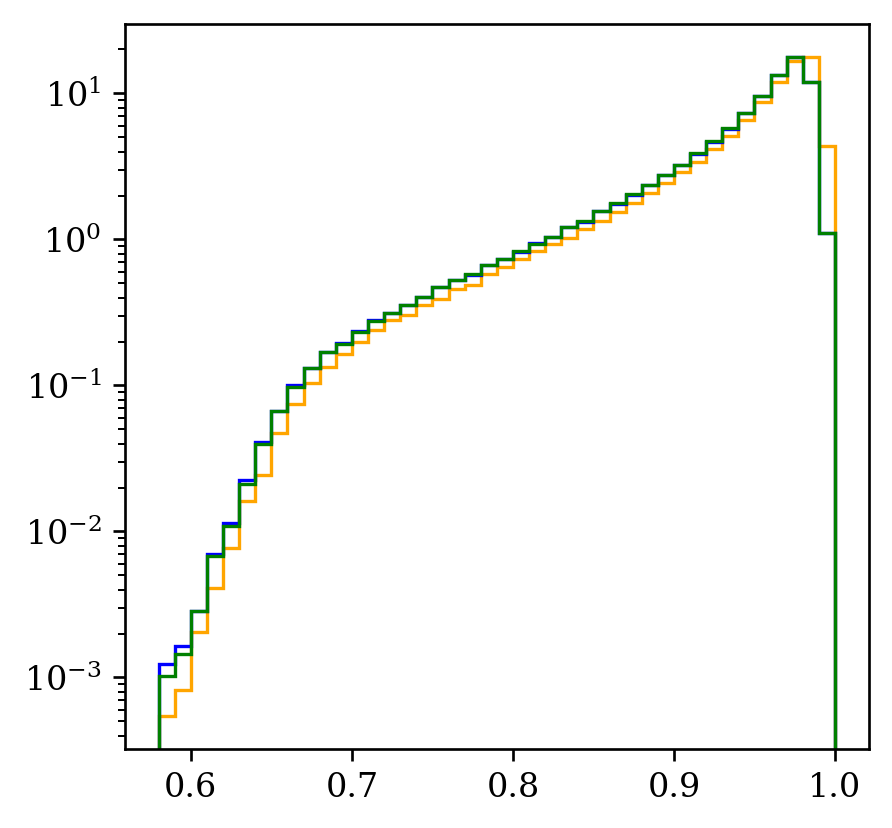

In [5]:
# compute the distributions to determine the bin-by-bin corrections
bins = np.linspace(0, 0.5, 51)

# ANTHONY TEST
# binsTEST = np.linspace(0,0.42,43)
binsTEST = np.linspace(0.58, 1.0, 43)

density = True

#plt.hist(nature['data_thrusts'], bins=bins, histtype='step', color='black', density=density)
simhist = plt.hist(synthetic['sim_thrusts'], bins=binsTEST, histtype='step', color='orange', density=density)[0]
genhist = plt.hist(synthetic['gen_thrusts'], bins=binsTEST, histtype='step', color='blue', density=density)[0]
genbhist = plt.hist(synthetic['genBefore_thrusts'], bins=binsTEST, histtype='step', color='green', density=density)[0]

plt.yscale('log')

plt.show()

In [ ]:
# Get statistics about each data set


## Specifying the Unfolding Problem

In [6]:
# how many iterations of the unfolding process
itnum = 3

In [7]:
# the observables to use for multifold (a single one just indicates unifold)
obs_multifold = ['Thrust']

In [8]:
# a dictionary to hold information about the observables
obs = {}

In [9]:
# the thrust and histogram style information
obs.setdefault('Thrust', {}).update({
    'func': lambda dset, ptype: dset[ptype + '_thrusts'],
    'nbins_det': 42, 'nbins_mc': 42, # 'nbins_det': 50, 'nbins_mc': 50,
    'yscale': 'log',
    'xlim': (0.58, 1.0), 'ylim': (10**-4.5, 20), 'ylim_ratio': (0.7, 1.3),
    'ytick_ratio_step': 0.15,
    'xlabel': r'Thrust $\tau$', 'symbol': r'$\tau$',
    'ylabel': r'Normalized Cross Section', 'ylabel_ratio': 'Ratio to\nALEPH',
    'stamp_xy': (0.5, 0.9),
    'legend_loc': 'lower left', 'legend_ncol': 1
})

# additional histogram and plot style information
hist_style = {'histtype': 'step', 'density': True, 'lw': 1, 'zorder': 2}
gen_style = {'linestyle': '--', 'color': 'blue', 'lw': 1.15, 'label': r'\textsc{Pythia} 6 Generation'}
truth_style = {'step': 'mid', 'edgecolor': 'green', 'facecolor': (0.75, 0.875, 0.75),
               'lw': 1.25, 'zorder': 0, 'label': 'ALEPH Measurement'}
ibu_style0 = {'ls': '-', 'marker': 'o', 'ms': 2.5, 'color': 'gray', 'zorder': 1}
ibu_style1 = {'ls': '-', 'marker': 'o', 'ms': 2.5, 'color': 'black', 'zorder': 1}
ibu_style2 = {'ls': '-', 'marker': 'o', 'ms': 2.5, 'color': 'purple', 'zorder': 1}
ibu_style3 = {'ls': '-', 'marker': 'o', 'ms': 2.5, 'color': 'red', 'zorder': 1}
ibu_style4 = {'ls': '-', 'marker': 'o', 'ms': 2.5, 'color': 'blue', 'zorder': 1}
omnifold_style = {'ls': '-', 'marker': 's', 'ms': 2.5, 'color': 'tab:red', 'zorder': 3}

In [10]:
# calculate quantities to be stored in obs
for obkey,ob in obs.items():
    
    # calculate observable for GEN, SIM, DATA, and TRUE
    ob['genobs'], ob['simobs'] = ob['func'](synthetic, 'gen'), ob['func'](synthetic, 'sim')
    ob['dataobs'] = ob['func'](nature, 'data')
    
    # setup bins
    ob['bins_det'] = np.linspace(ob['xlim'][0], ob['xlim'][1], ob['nbins_det']+1)
    ob['bins_mc'] = np.linspace(ob['xlim'][0], ob['xlim'][1], ob['nbins_mc']+1)
    ob['midbins_det'] = (ob['bins_det'][:-1] + ob['bins_det'][1:])/2
    ob['midbins_mc'] = (ob['bins_mc'][:-1] + ob['bins_mc'][1:])/2
    ob['binwidth_det'] = ob['bins_det'][1] - ob['bins_det'][0]
    ob['binwidth_mc'] = ob['bins_mc'][1] - ob['bins_mc'][0]
    
    # get the histograms of GEN, DATA, and TRUTH level observables
    ob['genobs_hist'] = np.histogram(ob['genobs'], bins=ob['bins_mc'], density=True)[0]
    ob['data_hist'] = np.histogram(ob['dataobs'], bins=ob['bins_det'], density=True)[0]

    # compute (and normalize) the response matrix between GEN and SIM
    ob['response'] = np.histogram2d(ob['simobs'], ob['genobs'], bins=(ob['bins_det'], ob['bins_mc']))[0]
    ob['response'] /= (ob['response'].sum(axis=0) + 10**-50)
    
    # perform iterative Bayesian unfolding
    ob['ibu_phis'] = ibu.ibu(ob['data_hist'], ob['response'], ob['genobs_hist'], 
                         ob['binwidth_det'], ob['binwidth_mc'], it=itnum)
    ob['ibu_phi_unc'] = ibu.ibu_unc(ob, it=itnum, nresamples=25)
    
    # do each year independently now
    obYears = [ob.copy(),ob.copy(),ob.copy(),ob.copy()]
    for i in range(0,4):
        obYears[i]['dataobs'] = ob['func'](natureYears[i],'data')
        obYears[i]['data_hist'] = np.histogram(obYears[i]['dataobs'], bins=obYears[i]['bins_det'], density=True)[0]
        obYears[i]['ibu_phis'] = ibu.ibu(obYears[i]['data_hist'], obYears[i]['response'], obYears[i]['genobs_hist'], 
                         obYears[i]['binwidth_det'], obYears[i]['binwidth_mc'], it=itnum)
        obYears[i]['ibu_phi_unc'] = ibu.ibu_unc(obYears[i], it=itnum, nresamples=25)
        
    print('Done with', obkey)

Done with Thrust


## Plot Unfolding Results

In [11]:
with open('HEPData-ins636645-v1-Table_54.csv', 'r') as f:
    
    vals = []
    for row in f:
        if row.startswith('#'):
            continue
            
        if row.startswith('T'):
            print(row.strip())
        else:
            vals.append(row.strip().split(','))
            
hepdata = np.asarray(vals, dtype=float)

THRUST,THRUST LOW,THRUST HIGH,(1/SIG)*D(SIG)/DTHRUST,stat +,stat -,sys_1 +,sys_1 -,sys_2 +,sys_2 -


In [12]:
corrs1 = genbhist/(genhist + 10**-50)

In [13]:
# Load in the MITHIG Results
mithigResult = np.array([1.069774,12.2987, 18.6592, 13.9147, 9.84372, 7.3845, 5.66399, 4.56175, 3.74498, 3.10906, 2.63452, 2.21059, 1.89997, 1.61367, 1.45827, 1.23605, 1.12457, 0.964038, 0.871965, 0.759606, 0.674833, 0.623541, 0.531461, 0.484212, 0.441152, 0.386028, 0.331683, 0.294767, 0.255663, 0.221432, 0.190178, 0.159378, 0.129585, 0.0910061, 0.0693034, 0.0426711, 0.0226695, 0.012361, 0.00684788, 0.00349327, 0.00234669, 0.00174467, 0.000475811])
mithigResult = np.array(list(reversed(mithigResult)))
mithigResult_errors = np.array([0.004428908, 0.0233364, 0.0275857, 0.0206703, 0.0160856, 0.0131812, 0.0110725, 0.00964027, 0.00849579, 0.00757102, 0.00690456, 0.00612002, 0.00560385, 0.00505261, 0.00479964, 0.00432782, 0.00416696, 0.0037444, 0.00362121, 0.00329415, 0.00314808, 0.00299579, 0.00273737, 0.00262936, 0.00255939, 0.00235433, 0.00217079, 0.00207108, 0.00195026, 0.00182395, 0.00175487, 0.00160134, 0.00146113, 0.00125216, 0.00120719, 0.000954147, 0.00076159, 0.000561817, 0.000470602, 0.000357146, 0.000446264, 0.000433266, 0.000237906])

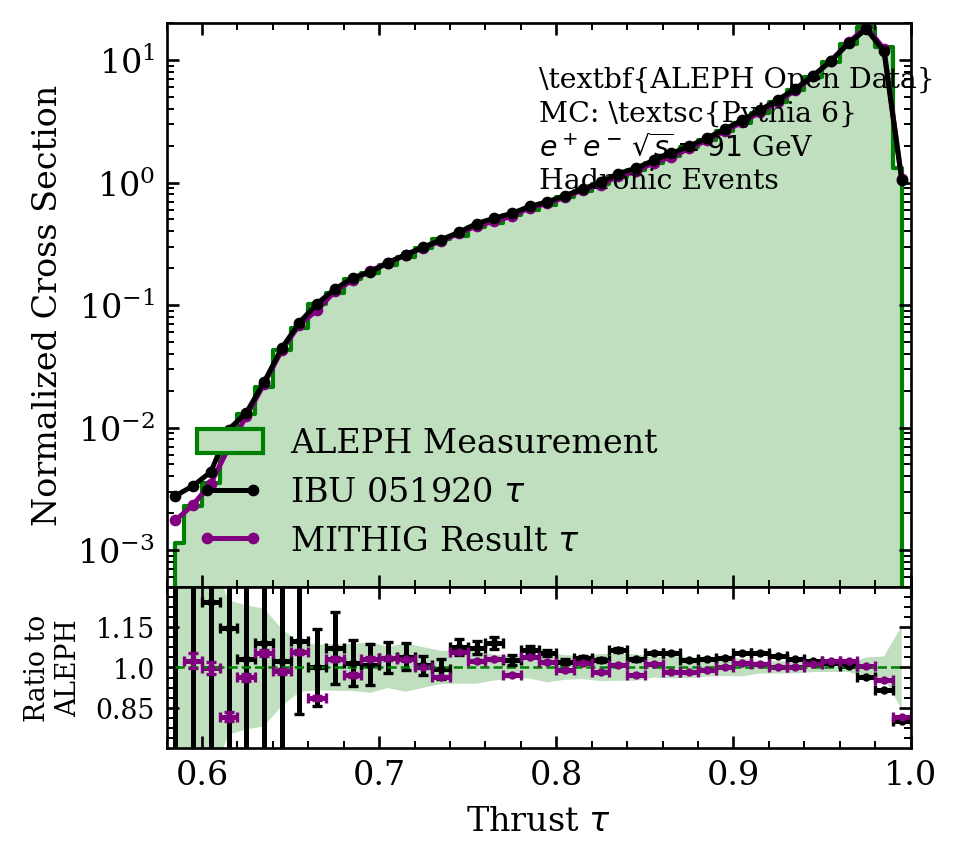

In [14]:
for i,(obkey,ob) in enumerate(obs.items()):
    # get the styled axes on which to plot
    fig, [ax0, ax1] = modplot.axes(**ob)
    #if ob.get('yscale') is not None:
     #   ax0.set_yscale(ob['yscale'])

        
    # Plot the Different Distributions of the Observable
    # plot the "data" histogram of the observable
    #ax0.hist(ob['dataobs'], bins=ob['bins_det'], color='black', label='ALEPH Open Data', **hist_style)

    # plot the "sim" histogram of the observable
    #ax0.hist(ob['simobs'], bins=ob['bins_det'], color='orange', label='ALEPH Open Simulation', **hist_style)

    # plot the "gen" histogram of the observable
    #ax0.plot(ob['midbins_mc'], ob['genobs_hist'], **gen_style)

    # plot the "truth" histogram of the observable
    #ax0.fill_between(ob['midbins_mc'], ob['truth_hist'], **truth_style)
    aleph_midbins = hepdata[::-1,0] # EDIT HERE
    aleph_thrust = hepdata[::-1,3]
    aleph_errs = np.linalg.norm(hepdata[::-1,[-1,-3,-5]], axis=1)
    ax0.fill_between(aleph_midbins, aleph_thrust, **truth_style)
    
    # Plot the Unfolded Distributions of the Observable
    # plot the OmniFold distribution
    #of_histgen, of_histgen_unc = modplot.calc_hist(ob['genobs'], weights=multifold_ws[2*itnum], 
     #                                              bins=ob['bins_mc'], density=True)[:2]
    #of_histgen *= corrs
    #ax0.plot(ob['midbins_mc'], of_histgen, **omnifold_style, label=r'UniFold $1-\tau$')
    
    # plot the IBU distribution before and after correction
    ibu_hist_corr1 = ob['ibu_phis'][itnum]*corrs1
    ax0.plot(ob['midbins_mc'], mithigResult[1:], **ibu_style2, label='MITHIG Result ' + ob['symbol'])
    ax0.plot(ob['midbins_mc'], ibu_hist_corr1, **ibu_style1, label='IBU 051920 ' + ob['symbol'])
    
    ax0.set_yscale('log')
    ax0.set_ylim(0.5*10**-3, 20)

    # Plot the Ratios of the OmniFold and IBU distributions to truth (with statistical uncertainties)
    aleph_thrust_test = np.array(list(reversed(aleph_thrust)))
    
    ibu_ratio_hist_corr1 = ibu_hist_corr1[:len(hepdata)]/(aleph_thrust_test + 10**-50)
    mithigResult_ratio = mithigResult[1:]/(aleph_thrust_test + 10**-50)
    ax1.plot([np.min(ob['midbins_mc']), np.max(ob['midbins_mc'])], [1, 1], '--', color='green', lw=0.75)
    
    # ratio uncertainties
    aleph_unc_ratio = aleph_errs/(aleph_thrust + 10**-50)
    ibu_unc_ratio = ob['ibu_phi_unc'][:len(hepdata)]/(aleph_thrust + 10**-50)
    
    aleph_unc_ratio_test = np.array(list(reversed(aleph_unc_ratio)))
    ibu_unc_ratio_corrected1 = list(reversed(ob['ibu_phi_unc'][:len(hepdata)]))/(aleph_thrust_test + 10**-50)*corrs1
    
    
    aleph_midbins_TEST = np.array(list(reversed(aleph_midbins)))
    ax1.fill_between(aleph_midbins_TEST, 1 - aleph_unc_ratio_test, 1 + aleph_unc_ratio_test, 
                     facecolor=truth_style['facecolor'], zorder=-2)
    ax1.errorbar(aleph_midbins_TEST, ibu_ratio_hist_corr1, xerr=ob['binwidth_mc']/2, yerr=ibu_unc_ratio_corrected1, 
                                              color=ibu_style1['color'], **modplot.style('errorbar'))
    ax1.errorbar(aleph_midbins_TEST, mithigResult_ratio, xerr=ob['binwidth_mc']/2, yerr=mithigResult_errors[1:], 
                                              color=ibu_style2['color'], **modplot.style('errorbar'))
    # legend style and ordering
    loc, ncol = ob.get('legend_loc', 'upper right'), ob.get('legend_ncol', 2)
    order = [2,1,0]
    modplot.legend(ax=ax0, frameon=False, order=order, loc=loc, ncol=ncol)

    # stamp to put on the plots
    modplot.stamp(*ob['stamp_xy'], delta_y=0.06, ax=ax0,
                  line_0=r'\textbf{ALEPH Open Data}',
                  line_1=r'MC: \textsc{Pythia 6}',
                  line_2=r'$e^+e^-\,\sqrt{s}=91$ GeV',
                  line_3='Hadronic Events')

    # save plot (by default in the same directory as this notebook).
    # If running on binder, the plot can be accessed by first going to the jupyter file browser
    # (which itself can be accessed by copying the URL of this notebook and removing the name of the notebook
    # after the final "/"), selecting the square next to the name of the plot, and clicking "Download".
    fig.savefig('IBU_Crosscheck_{}.pdf'.format(obkey), bbox_inches='tight')
    plt.show()

[1.58615539 1.42886199 1.24466946 1.4062325  1.06887795 1.033993
 1.04061064 1.03897192 1.13078941 1.04094626 1.04592621 0.97899687
 1.0027119  1.00961106 1.0067738  1.03024114 1.01876117 1.04838439
 1.05811318 1.05483928 1.02549917 1.03236998 1.03220514 1.01595562
 1.04494959 1.05378528 1.05923471 1.04181299 1.07121303 1.04479525
 1.04216121 1.03503259 1.03823177 1.04292421 1.03839107 1.02889048
 1.01038172 0.99620392 0.98411233 0.95969744 0.95897859 0.98230039]


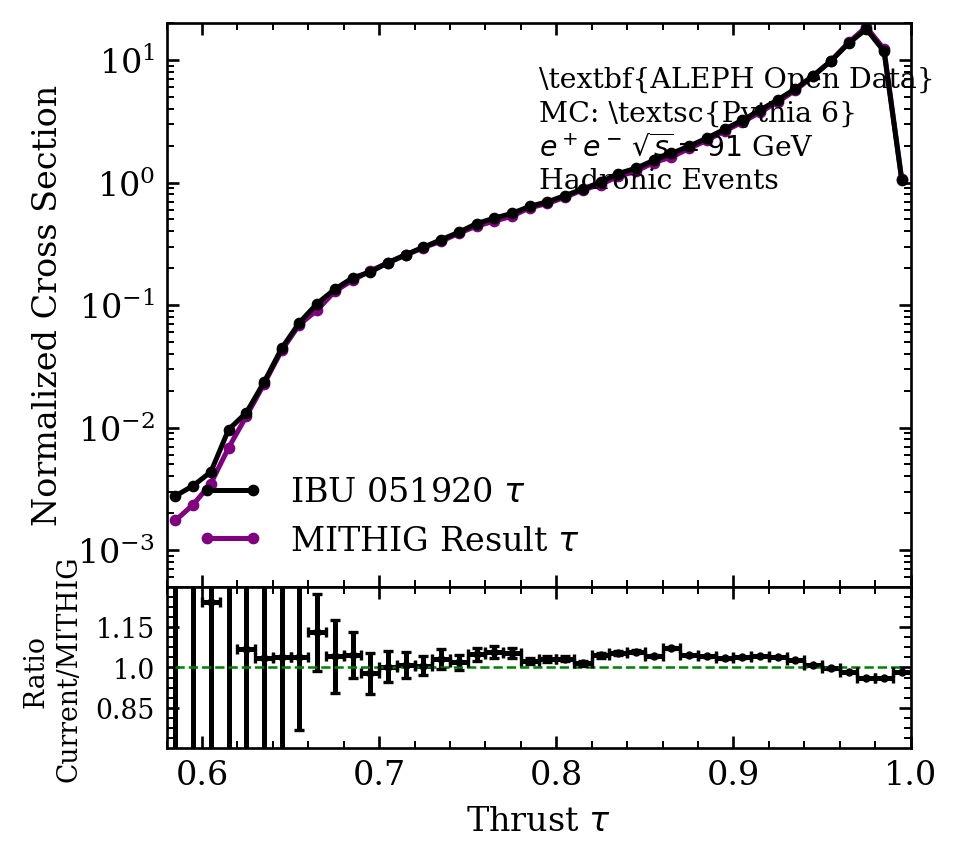

In [15]:
# Get various ratios

# ratio of current ibu to mithig result
ibu_To_MITHIG_ratio = ibu_ratio_hist_corr1 / mithigResult_ratio
print(ibu_To_MITHIG_ratio)

# get the styled axes on which to plot
fig, [ax0,ax1] = modplot.axes(**ob)
ax0.set_yscale('log')
ax0.set_ylim(0.5*10**-3, 20)
    
ax0.plot(ob['midbins_mc'], mithigResult[1:], **ibu_style2, label='MITHIG Result ' + ob['symbol'])

#ax0.plot(ob['midbins_mc'], ibu_hist, **ibu_style0, label='IBU' + ob['symbol'])
ax0.plot(ob['midbins_mc'], ibu_hist_corr1, **ibu_style1, label='IBU 051920 ' + ob['symbol'])

ax1.plot([np.min(ob['midbins_mc']), np.max(ob['midbins_mc'])], [1, 1], '--', color='green', lw=0.75)
ax1.errorbar(aleph_midbins_TEST, ibu_To_MITHIG_ratio, xerr=ob['binwidth_mc']/2, yerr=ibu_unc_ratio_corrected1, 
                                              color=ibu_style1['color'], **modplot.style('errorbar'))
ax1.set_ylabel("Ratio \nCurrent/MITHIG")
# legend style and ordering
loc, ncol = ob.get('legend_loc', 'upper right'), ob.get('legend_ncol', 2)
order = [1,0]
modplot.legend(ax=ax0, frameon=False, order=order, loc=loc, ncol=ncol)

# stamp to put on the plots
modplot.stamp(*ob['stamp_xy'], delta_y=0.06, ax=ax0,
              line_0=r'\textbf{ALEPH Open Data}',
              line_1=r'MC: \textsc{Pythia 6}',
              line_2=r'$e^+e^-\,\sqrt{s}=91$ GeV',
              line_3='Hadronic Events')

fig.savefig('IBU_vs_MITHIG_{}.pdf'.format(obkey), bbox_inches='tight')
plt.show()

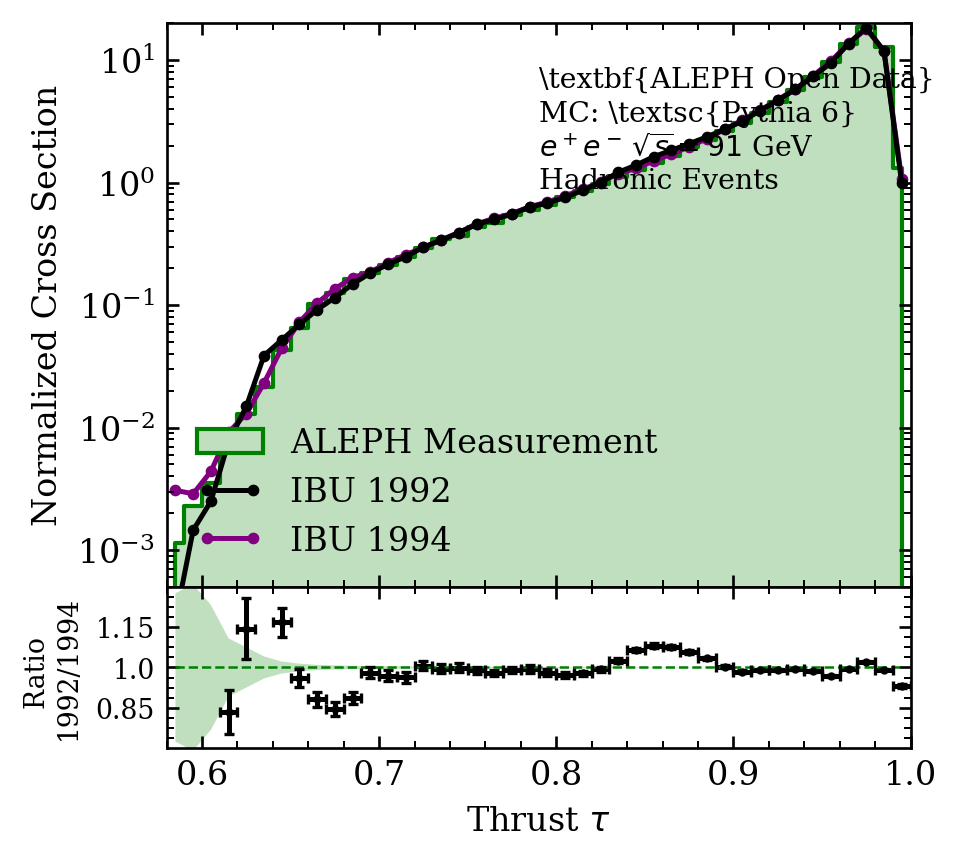

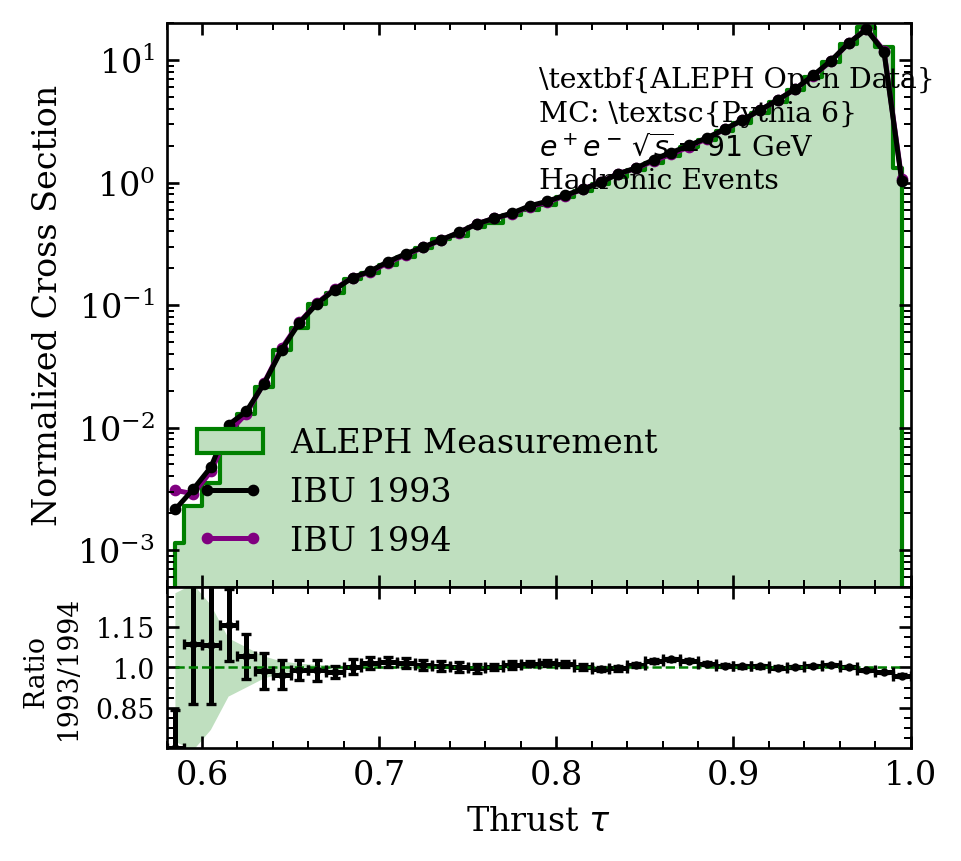

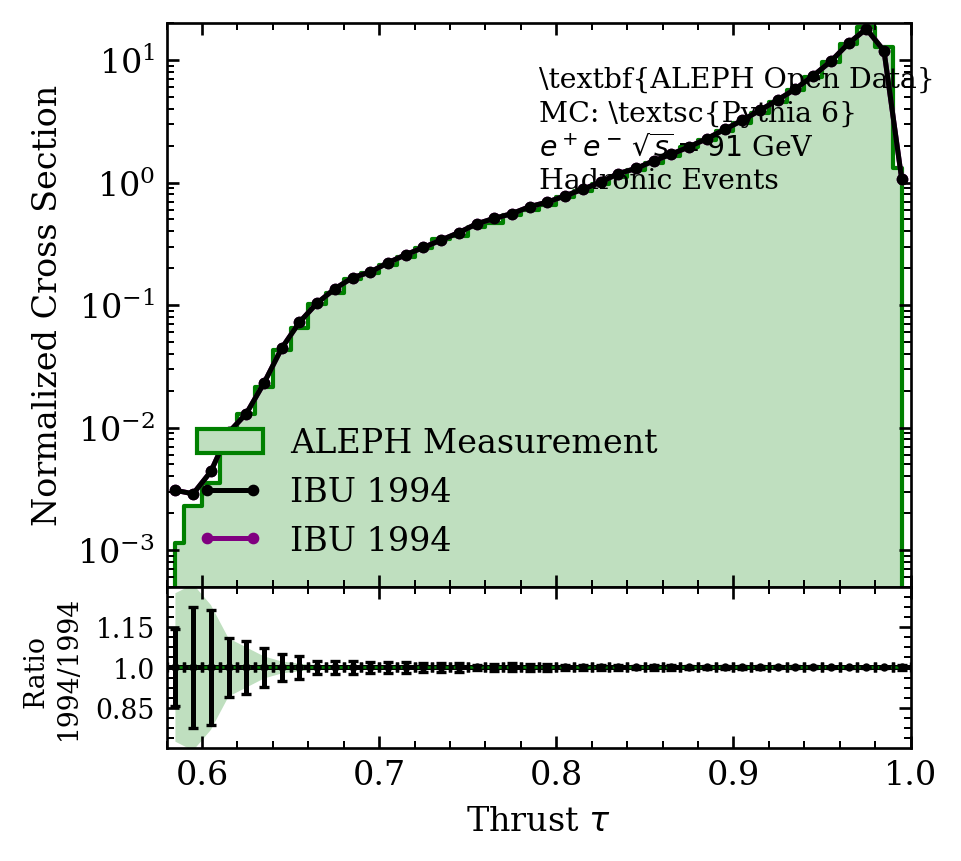

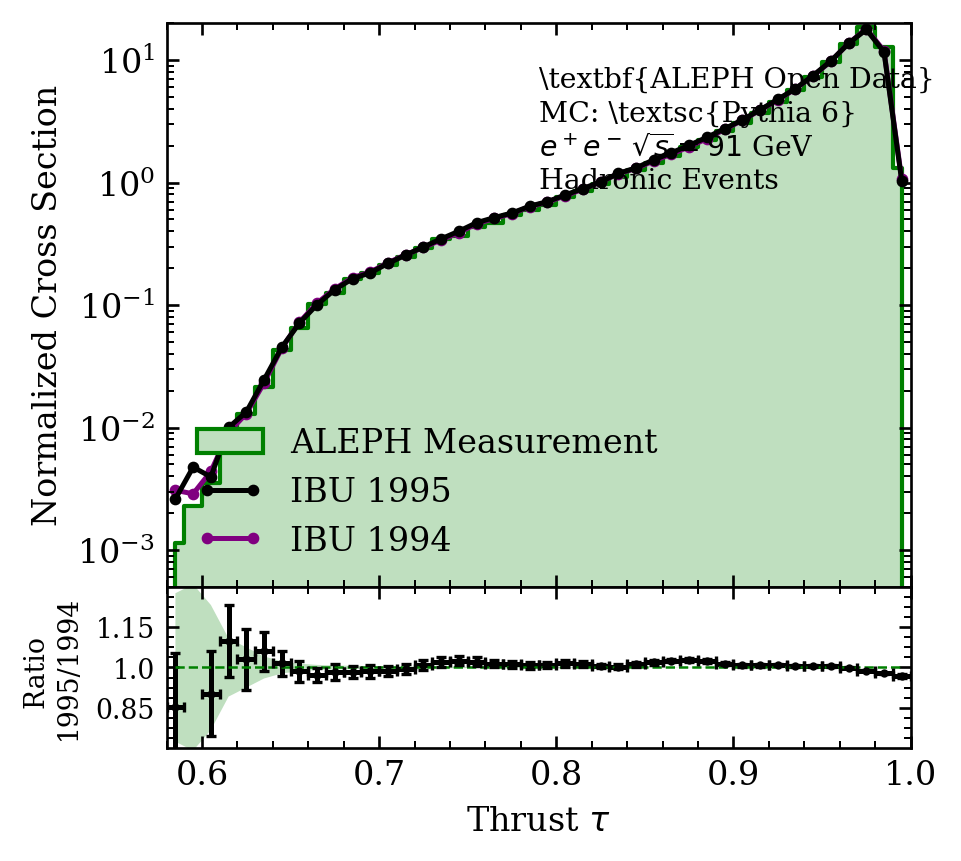

In [21]:
plt.rcParams['text.usetex'] = False

# Repeat the above but for each year
# Compute the 1994 distributions for comparison to. 1994 is the largest data set and the year from which the 
# archived MC is from

index1994 = 2
ibu_hist_corr1_1994 = obYears[index1994]['ibu_phis'][itnum]*corrs1
ibu_unc_1994 = obYears[index1994]['ibu_phi_unc'][itnum]*corrs1
ibu_unc_ratio_1994 = ibu_unc_1994/(ibu_hist_corr1_1994 + 10**-50)

for j in range(0,len(obYears)):
    ob = obYears[j]
    
    #print(ob)
    # get the styled axes on which to plot
    fig, [ax0, ax1] = modplot.axes(**ob)

    aleph_midbins = hepdata[::-1,0]
    aleph_thrust = hepdata[::-1,3]
    aleph_errs = np.linalg.norm(hepdata[::-1,[-1,-3,-5]], axis=1)
    ax0.fill_between(aleph_midbins, aleph_thrust, **truth_style)

    # plot the IBU distribution before and after correction
    ibu_hist_corr1 = ob['ibu_phis'][itnum]*corrs1
    ax0.plot(ob['midbins_mc'], ibu_hist_corr1_1994, **ibu_style2, label='IBU 1994 ')
    ax0.plot(ob['midbins_mc'], ibu_hist_corr1, **ibu_style1, label='IBU {} '.format(years[j]))

    ax0.set_yscale('log')
    ax0.set_ylim(0.5*10**-3, 20)

    # Plot the Ratios of the IBU distributions to 1994 year
    aleph_thrust_test = np.array(list(reversed(aleph_thrust)))
    ibu_ratio_hist_corr1 = ibu_hist_corr1/(ibu_hist_corr1_1994 + 10**-50)
    # ratio uncertainties
    ibu_unc_ratio_corrected1 = ob['ibu_phi_unc']/(ibu_hist_corr1_1994 + 10**-50)*corrs1
    
    ax1.plot([np.min(ob['midbins_mc']), np.max(ob['midbins_mc'])], [1, 1], '--', color='green', lw=0.75)
    ax1.fill_between(ob['midbins_mc'], 1 - ibu_unc_ratio_1994, 1 + ibu_unc_ratio_1994, 
                     facecolor=truth_style['facecolor'], zorder=-2)
    ax1.errorbar(ob['midbins_mc'], ibu_ratio_hist_corr1, xerr=ob['binwidth_mc']/2, yerr=ibu_unc_ratio_corrected1, 
                                              color=ibu_style1['color'], **modplot.style('errorbar'))
    
    ax1.set_ylabel("Ratio \n{}/1994".format(years[j]))
    
    # legend style and ordering
    loc, ncol = ob.get('legend_loc', 'upper right'), ob.get('legend_ncol', 2)
    order = [2,1,0]
    modplot.legend(ax=ax0, frameon=False, order=order, loc=loc, ncol=ncol)

    # stamp to put on the plots
    modplot.stamp(*ob['stamp_xy'], delta_y=0.06, ax=ax0,
                  line_0=r'\textbf{ALEPH Open Data}',
                  line_1=r'MC: \textsc{Pythia 6}',
                  line_2=r'$e^+e^-\,\sqrt{s}=91$ GeV',
                  line_3='Hadronic Events')

    # save plot (by default in the same directory as this notebook).
    # If running on binder, the plot can be accessed by first going to the jupyter file browser
    # (which itself can be accessed by copying the URL of this notebook and removing the name of the notebook
    # after the final "/"), selecting the square next to the name of the plot, and clicking "Download".
    fig.savefig('IBU_Crosscheck_Ratio{}to1994.pdf'.format(years[j]), bbox_inches='tight')
    plt.show()